# PCA with Scratch

1. Import required libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import eig
from sklearn.decomposition import PCA

2. Load the dataset and remove the `Date` column, and plot it

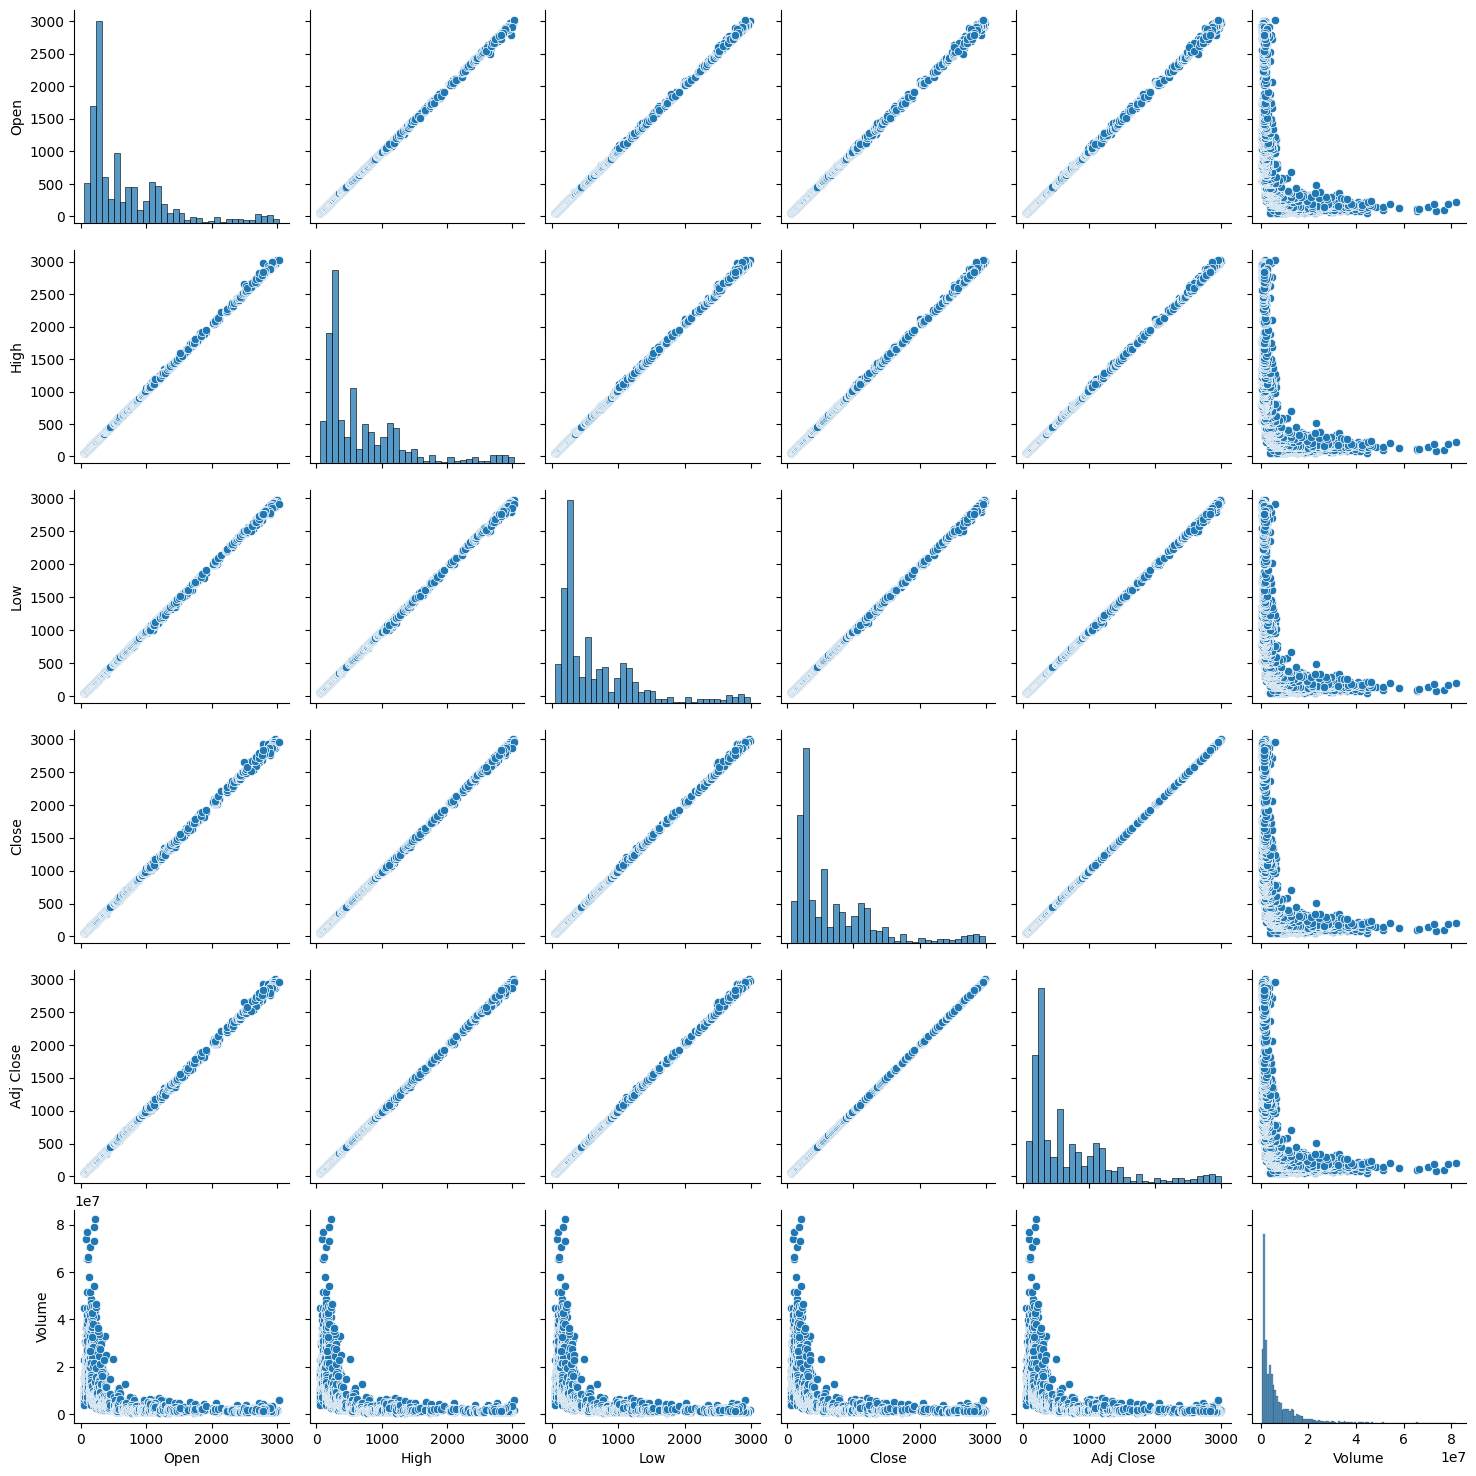

In [17]:
data = pd.read_csv('../Datasets/Week-8 (PCA with Scratch)/GOOGL.csv').drop(columns=['Date'])
sns.pairplot(data)

3. Data Normalization

In [18]:
def normalize_data(data):
    return (data - data.mean()) / data.std()

normalized_data = normalize_data(data)
normalized_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,-0.996773,-0.994354,-0.999172,-0.996419,-0.996419,4.969098
1,-0.995990,-0.990496,-0.995614,-0.990236,-0.990236,2.131158
2,-0.988433,-0.987115,-0.988912,-0.989390,-0.989390,1.535838
3,-0.988053,-0.988560,-0.993207,-0.992905,-0.992905,1.144596
4,-0.992925,-0.991326,-0.992964,-0.992028,-0.992028,0.356760


4. Covariance calculation

In [19]:
def covar(data):
    return np.dot(data.T, data) / (data.shape[0] - 1)

covar_matrix = covar(normalized_data)
covar_matrix

array([[ 1.        ,  0.99991523,  0.99990248,  0.99980806,  0.99980806,
        -0.45388433],
       [ 0.99991523,  1.        ,  0.99987656,  0.99990272,  0.99990272,
        -0.45285544],
       [ 0.99990248,  0.99987656,  1.        ,  0.99991415,  0.99991415,
        -0.45544721],
       [ 0.99980806,  0.99990272,  0.99991415,  1.        ,  1.        ,
        -0.45425163],
       [ 0.99980806,  0.99990272,  0.99991415,  1.        ,  1.        ,
        -0.45425163],
       [-0.45388433, -0.45285544, -0.45544721, -0.45425163, -0.45425163,
         1.        ]])

5. Eigen Vector Calculation

In [20]:
w,v=eig(covar_matrix)
print(f'EigenValues={w}\n\nEigenvectors={v}')

EigenValues=[ 5.24263577e+00  7.56946230e-01  2.71606923e-04  1.18006602e-04
  2.83882262e-05 -6.90639791e-22]

Eigenvectors=[[ 4.34905489e-01 -1.04407202e-01  6.99170760e-01  5.81060908e-02
  -5.54743439e-01 -1.01681966e-17]
 [ 4.34873360e-01 -1.05751771e-01  1.96410562e-01 -6.88115636e-01
   5.36303540e-01  1.77344587e-16]
 [ 4.34989279e-01 -1.02422693e-01  7.11708797e-02  7.20495903e-01
   5.25465773e-01  7.94350833e-17]
 [ 4.34937652e-01 -1.03961367e-01 -4.83486064e-01 -4.47272573e-02
  -2.53499450e-01 -7.07106781e-01]
 [ 4.34937652e-01 -1.03961367e-01 -4.83486064e-01 -4.47272573e-02
  -2.53499450e-01  7.07106781e-01]
 [-2.32777107e-01 -9.72527305e-01 -5.45996092e-04  2.26979323e-03
   9.54631766e-05 -5.90726888e-18]]


6. Plot with PyPlot

Text(0.5, 0, 'Magnitude of the eigenvalue')

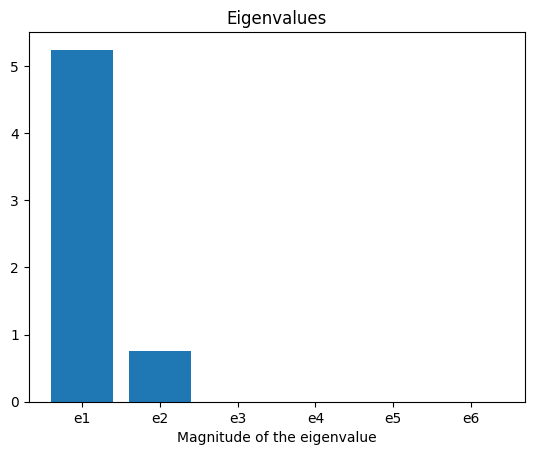

In [21]:
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

7. Reduce the Dimensions and plot the graphs with 2 principle components

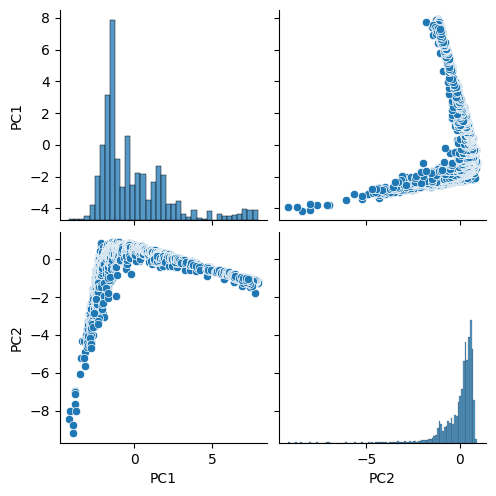

In [22]:
useful_data = np.dot(normalized_data, v[:, :2])
useful_data = pd.DataFrame(useful_data, columns=["PC1", "PC2"])
useful_data.head()

sns.pairplot(useful_data)

8. Repeat with 3 components with 3d plots

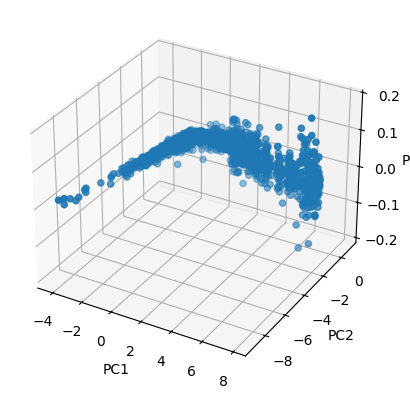

In [23]:
# using 3 components and 3D plot
useful_data = np.dot(normalized_data, v[:, :3])
useful_data = pd.DataFrame(useful_data, columns=["PC1", "PC2", "PC3"])
useful_data.head()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(useful_data['PC1'], useful_data['PC2'], useful_data['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

9. Now we cross-check by thing the inbuilt PCA library for 2 Components

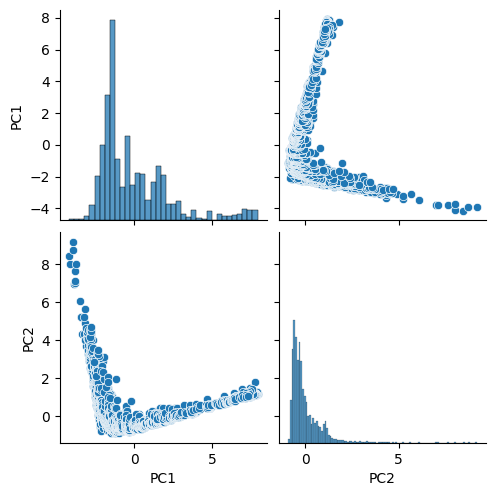

In [24]:
# using inbuilt PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_data.head()

sns.pairplot(pca_data)

10. Inbuilt PCA with 3 components with 3D Graph

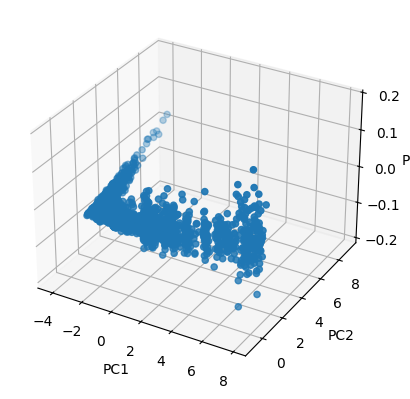

In [25]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(normalized_data)
pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])
pca_data.head()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()